# Evaluation matrices (binary classification)

## Setting up
- Breat cancer data
- 2 classes
- 30 features
- SVC

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Breast cancer data
from sklearn.datasets import load_breast_cancer

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target
print(np.unique(y))
print(X.shape)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20,
    stratify=y,
    random_state=1)

# Constructing a pipeline object
pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])

[0 1]
(569, 30)


## Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix

# Training
pipe_svc.fit(X_train, y_train)

# Prediction from test data
y_pred = pipe_svc.predict(X_test)

# Confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[40  2]
 [ 0 72]]


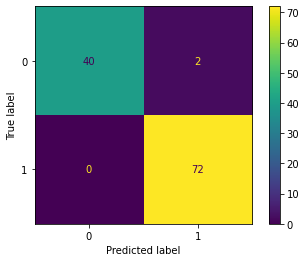

In [15]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test)  
plt.show()  

In [16]:
# Note that the class 0 is "malignant" and class 1 is "benign".
print(dataObj.target_names)

['malignant' 'benign']


### Note 

- The class 0 samples that are correctly predicted as class 0 are now in the upper left corner of the matrix. 
- In order to change the ordering, we can use the "labels" argument.

In [17]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)

[[72  0]
 [ 2 40]]


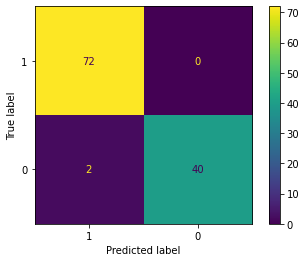

In [18]:
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test, labels=[1,0])  
plt.show()  

## Accuracy, Precision, Recall, and F1

In [19]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score

# Accuracy
ACC = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy:{ACC:6.3f}")

# Precision
PRE = precision_score(y_true=y_test, y_pred=y_pred)
print(f"Precision:{PRE:6.3f}")

# Recall
REC = recall_score(y_true=y_test, y_pred=y_pred)
print(f"Recall:{REC:6.3f}")

# F1
F1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"F1:{REC:6.3f}")

Accuracy: 0.982
Precision: 0.973
Recall: 1.000
F1: 1.000


## Use F1 score in grid search

In [20]:
from sklearn.model_selection import GridSearchCV

c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
set1 = {'clf__C': param_range, 'clf__kernel': ['linear']}
set2 = {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}
param_grid = [set1, set2]

# Grid search. Note the "scoring" argument
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9811725983573778
{'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


## Use F1 score in grid search (scorer method)

In [21]:
from sklearn.metrics import make_scorer

# Making score.
scorer = make_scorer(f1_score, pos_label=1)

In [22]:
# Grid search. Note the "scoring" argument
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
                  
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9811725983573778
{'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
